In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [28]:
caseframe=pd.read_csv('data/case.csv', sep=';', encoding="windows-1251", thousands=",", index_col=0)
print(caseframe.info)

<bound method DataFrame.info of       case_id data_income  cristal_id  way_id data_install data_outcome  \
0    30013347  10.01.2020           1       1   20.01.2020   20.01.2020   
1    30013347  10.01.2020           1       3   27.01.2020   29.01.2020   
2    30013347  10.01.2020           1       6   01.02.2020   06.02.2020   
3    30012088  07.02.2020           1       4   09.02.2020   14.02.2020   
4    30012088  07.02.2020           1       4   16.02.2020   20.02.2020   
..        ...         ...         ...     ...          ...          ...   
196  30014825  26.07.2020          18       6   31.07.2020   04.08.2020   
197  30014825  26.07.2020          18       2   05.08.2020   09.08.2020   
198  30014825  26.07.2020          18       5   15.08.2020   17.08.2020   
199  30014818  17.08.2020          18       6   18.08.2020   21.08.2020   
200  30014818  17.08.2020          18       5   23.08.2020   26.08.2020   

      reason  metal_mass  gap  R1  r1  left  right  remark  value  

In [29]:
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [30]:
caseframe=caseframe.fillna('hz')
caseframe=MultiColumnLabelEncoder(columns = ['remark','reason']).fit_transform(caseframe)
print(caseframe.head(10))

    case_id data_income  cristal_id  way_id data_install data_outcome  reason  \
0  30013347  10.01.2020           1       1   20.01.2020   20.01.2020       5   
1  30013347  10.01.2020           1       3   27.01.2020   29.01.2020       7   
2  30013347  10.01.2020           1       6   01.02.2020   06.02.2020       7   
3  30012088  07.02.2020           1       4   09.02.2020   14.02.2020       7   
4  30012088  07.02.2020           1       4   16.02.2020   20.02.2020       7   
5  30011717  21.02.2020           1       1   22.02.2020   26.02.2020       7   
6  30011717  21.02.2020           1       3   28.02.2020   05.03.2020       7   
7  30011717  21.02.2020           1       4   08.03.2020   12.03.2020       7   
8  30011717  21.02.2020           1       1   13.03.2020   13.03.2020       7   
9  30011717  21.02.2020           1       2   22.03.2020   28.03.2020       7   

   metal_mass  gap  R1  r1  left right  remark value  size  
0           0    5   5   5     5     5       4 

<AxesSubplot:>

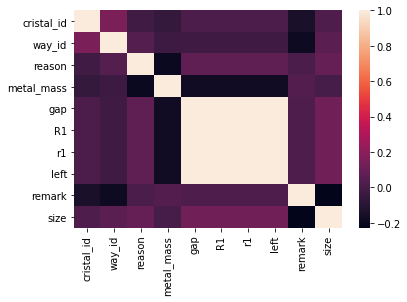

In [31]:
corr = caseframe.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [32]:
paramframe=pd.read_csv('data/param.csv', sep=';', encoding="windows-1251", thousands=",", index_col=0,header=0)
print(paramframe.head())

           plavka data_income  Вес заготовок, т Марка стали полученная  \
№ п/п                                                                    
1.0    12004615.0  01.07.2020           16896.0                 Арм500   
2.0    12004616.0  01.07.2020          165888.0                 Арм500   
3.0    12004617.0  01.07.2020          165888.0                 Арм500   
4.0    12004618.0  01.07.2020          172032.0                 Арм500   
5.0    12004619.0  01.07.2020          156672.0                 Арм500   

                  ГОСТ  Плавка в серии Сечение заготовки Тип разливки  \
№ п/п                                                                   
1.0    ГОСТ 34028-2016             5.0           180x180     Открытая   
2.0    ГОСТ 34028-2016             6.0           180x180     Открытая   
3.0    ГОСТ 34028-2016             7.0           180x180     Открытая   
4.0    ГОСТ 34028-2016             8.0           180x180     Открытая   
5.0    ГОСТ 34028-2016             9.0     

<AxesSubplot:>

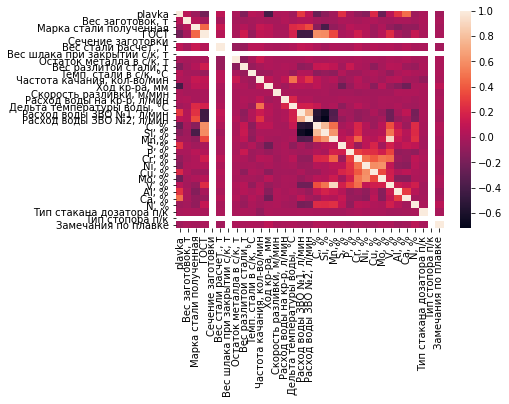

In [33]:
paramframe.dropna(subset = ["plavka"], inplace=True)
paramframe=paramframe.fillna('hz')
paramframe=MultiColumnLabelEncoder(columns = ['Сечение заготовки','Тип стопора п/к','Замечания по плавке','Тип стакана дозатора п/к','ГОСТ','Марка стали полученная']).fit_transform(paramframe)
paramframe['plavka']=paramframe['plavka'].astype('int64')
corr2 = paramframe.corr()
sns.heatmap(corr2,
            xticklabels=corr2.columns.values,
            yticklabels=corr2.columns.values)

In [34]:
geomframe=pd.read_csv('data/geom.csv', sep=';', encoding="windows-1251",thousands=",", index_col=0,header=0)
inform_col=['plavka' , 'ruchey', 'nlz' , 'romb'  ,'max' , 'min' , 'delta']
geomframe=geomframe[inform_col]
print(geomframe.head())


       plavka  ruchey           nlz  romb  max  min  delta
ind                                                       
1    12002874       1  120028741105     4  151  150      1
2    12002874       2  120028741205     3  151  151      0
3    12002874       3  120028741305     2  151  150      1
4    12002874       4  120028741405     2  151  151      0
5    12002874       5  120028741505     4  151  151      0


In [35]:
full=pd.merge(paramframe,geomframe, on='plavka')

In [36]:
print(full.head())

     plavka data_income  Вес заготовок, т  Марка стали полученная  ГОСТ  \
0  12004615  01.07.2020           16896.0                       4     2   
1  12004615  01.07.2020           16896.0                       4     2   
2  12004615  01.07.2020           16896.0                       4     2   
3  12004615  01.07.2020           16896.0                       4     2   
4  12004615  01.07.2020           16896.0                       4     2   

  Плавка в серии  Сечение заготовки Тип разливки Вес стали (со стенда ППС), т  \
0              5                  0     Открытая                           hz   
1              5                  0     Открытая                           hz   
2              5                  0     Открытая                           hz   
3              5                  0     Открытая                           hz   
4              5                  0     Открытая                           hz   

   Вес стали расчет., т  ...  Тип погружного стакана  \
0     

<AxesSubplot:>

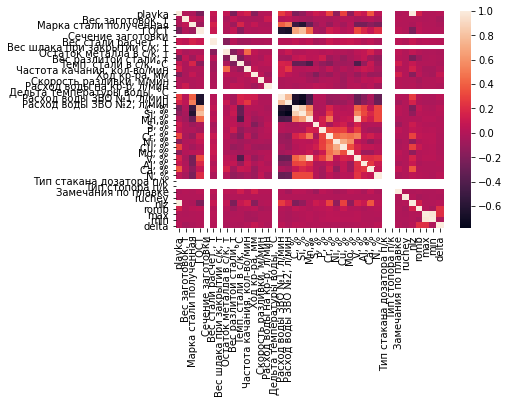

In [37]:
corr = full.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [38]:
full_2=pd.merge(full,caseframe, on='data_income')

In [39]:
print(full_2.head())

     plavka data_income  Вес заготовок, т  Марка стали полученная  ГОСТ  \
0  12004615  01.07.2020           16896.0                       4     2   
1  12004615  01.07.2020           16896.0                       4     2   
2  12004615  01.07.2020           16896.0                       4     2   
3  12004615  01.07.2020           16896.0                       4     2   
4  12004615  01.07.2020           16896.0                       4     2   

  Плавка в серии  Сечение заготовки Тип разливки Вес стали (со стенда ППС), т  \
0              5                  0     Открытая                           hz   
1              5                  0     Открытая                           hz   
2              5                  0     Открытая                           hz   
3              5                  0     Открытая                           hz   
4              5                  0     Открытая                           hz   

   Вес стали расчет., т  ...  reason  metal_mass  gap R1 r1 le

<AxesSubplot:>

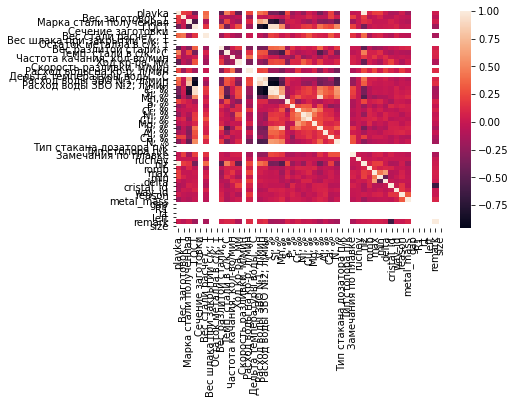

In [40]:
corr = full_2.corr()
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)